In [1]:

import pandas as pd
import nltk
from nltk import FreqDist
from nltk.book import *
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)
pd.set_option('display.max_rows', 1000)

sentenceTokenizer = nltk.data.load('tokenizers/punkt/italian.pickle')


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
#qui semplicemente sostituire la frase con quella desiderata

#ATTENZIONE CON GLI APOSTROFI!
#ad esempio le parole:
#dell'anno
#verrebbero lette come token unico ("dell'anno")
#inserire uno spazio fra l'apostrofo e la parola che segue
#quindi scrivere:
#dell' anno

#in questa tokenizzazione NON ho messo lo spazio, quindi ad esempio "dell'anno", "l'Illustrissimo" sono considerati token unici

frase = "Convien credere però che non ci si mettesse con tutta quella buona voglia che sapeva impiegare nell'ordir cabale, e nel suscitar nemici al suo gran nemico Enrico IV; giacché, per questa parte, la storia attesta come riuscisse ad armare contro quel re il duca di Savoia, a cui fece perder più d'una città; come riuscisse a far congiurare il duca di Biron, a cui fece perder la testa; ma, per ciò che riguarda quel seme tanto pernizioso de' bravi, certo è che esso continuava a germogliare, il 22 settembre dell'anno 1612. In quel giorno l'Illustrissimo ed Eccellentissimo Signore, il Signor Don Giovanni de Mendozza, Marchese de la Hynojosa, Gentiluomo etc., Governatore etc., pensò seriamente ad estirparlo. A quest'effetto, spedì a Pandolfo e Marco Tullio Malatesti, stampatori regii camerali, la solita grida, corretta ed accresciuta, perché la stampassero ad esterminio de' bravi. Ma questi vissero ancora per ricevere, il 24 decembre dell'anno 1618, gli stessi e più forti colpi dall'Illustrissimo ed Eccellentissimo Signore, il Signor Don Gomez Suarez de Figueroa, Duca di Feria, etc., Governatore etc. Però, non essendo essi morti neppur di quelli, l'Illustrissimo ed Eccellentissimo Signore, il Signor Gonzalo Fernandez di Cordova, sotto il cui governo accadde la passeggiata di don Abbondio, s'era trovato costretto a ricorreggere e ripubblicare la solita grida contro i bravi, il giorno 5 ottobre del 1627, cioè un anno, un mese e due giorni prima di quel memorabile avvenimento.Né fu questa l'ultima pubblicazione; ma noi delle posteriori non crediamo dover far menzione, come di cosa che esce dal periodo della nostra storia. Ne accenneremo soltanto una del 13 febbraio dell'anno 1632, nella quale l'Illustrissimo ed Eccellentissimo Signore, el Duque de Feria, per la seconda volta governatore, ci avvisa che le maggiori sceleraggini procedono da quelli che chiamano bravi. Questo basta ad assicurarci che, nel tempo di cui noi trattiamo, c'era de' bravi tuttavia."
tokenized = nltk.word_tokenize(frase)
tokenized


['Convien',
 'credere',
 'però',
 'che',
 'non',
 'ci',
 'si',
 'mettesse',
 'con',
 'tutta',
 'quella',
 'buona',
 'voglia',
 'che',
 'sapeva',
 'impiegare',
 "nell'ordir",
 'cabale',
 ',',
 'e',
 'nel',
 'suscitar',
 'nemici',
 'al',
 'suo',
 'gran',
 'nemico',
 'Enrico',
 'IV',
 ';',
 'giacché',
 ',',
 'per',
 'questa',
 'parte',
 ',',
 'la',
 'storia',
 'attesta',
 'come',
 'riuscisse',
 'ad',
 'armare',
 'contro',
 'quel',
 're',
 'il',
 'duca',
 'di',
 'Savoia',
 ',',
 'a',
 'cui',
 'fece',
 'perder',
 'più',
 "d'una",
 'città',
 ';',
 'come',
 'riuscisse',
 'a',
 'far',
 'congiurare',
 'il',
 'duca',
 'di',
 'Biron',
 ',',
 'a',
 'cui',
 'fece',
 'perder',
 'la',
 'testa',
 ';',
 'ma',
 ',',
 'per',
 'ciò',
 'che',
 'riguarda',
 'quel',
 'seme',
 'tanto',
 'pernizioso',
 'de',
 "'",
 'bravi',
 ',',
 'certo',
 'è',
 'che',
 'esso',
 'continuava',
 'a',
 'germogliare',
 ',',
 'il',
 '22',
 'settembre',
 "dell'anno",
 '1612',
 '.',
 'In',
 'quel',
 'giorno',
 "l'Illustrissimo",
 'e

In [86]:
#da qui in poi le operazioni manuali finiscono ed è tutto automatizzato!

In [4]:
vocabulary1 = list(set(tokenized))
sortedVocabulary1 = sorted(vocabulary1)
print("Vocabolario del testo: " + str(sortedVocabulary1))

Vocabolario del testo: ["'", ',', '.', '13', '1612', '1618', '1627', '1632', '22', '24', '5', ';', 'A', 'Abbondio', 'Biron', 'Convien', 'Cordova', 'Don', 'Duca', 'Duque', 'Eccellentissimo', 'Enrico', 'Feria', 'Fernandez', 'Figueroa', 'Gentiluomo', 'Giovanni', 'Gomez', 'Gonzalo', 'Governatore', 'Hynojosa', 'IV', 'In', 'Ma', 'Malatesti', 'Marchese', 'Marco', 'Mendozza', 'Ne', 'Pandolfo', 'Però', 'Questo', 'Savoia', 'Signor', 'Signore', 'Suarez', 'Tullio', 'a', 'accadde', 'accenneremo', 'accresciuta', 'ad', 'al', 'ancora', 'anno', 'armare', 'assicurarci', 'attesta', 'avvenimento.Né', 'avvisa', 'basta', 'bravi', 'buona', "c'era", 'cabale', 'camerali', 'certo', 'che', 'chiamano', 'ci', 'cioè', 'città', 'ciò', 'colpi', 'come', 'con', 'congiurare', 'continuava', 'contro', 'corretta', 'cosa', 'costretto', 'credere', 'crediamo', 'cui', "d'una", 'da', 'dal', "dall'Illustrissimo", 'de', 'decembre', 'del', "dell'anno", 'della', 'delle', 'di', 'don', 'dover', 'duca', 'due', 'e', 'ed', 'el', 'esce',

In [5]:
tokens = len(tokenized)
print("Numero di token: " + str(tokens))

Numero di token: 362


In [6]:
tipo = len(sortedVocabulary1) 
print("Numero di parole tipo: " + str(tipo))

Numero di parole tipo: 208


In [7]:
TTR = tipo/tokens
print("Type Token Ratio: " + str(TTR))
print("Frequenza media delle parole: " + str(1/TTR))

Type Token Ratio: 0.574585635359116
Frequenza media delle parole: 1.7403846153846154


In [19]:
#distribuzione di frequenza delle parole presenti in tokenized
#cioè la versione tokenizzata del testo (v. inizio codice)
fdist1 = FreqDist(tokenized)
DF = pd.DataFrame(list(fdist1.items()), columns = ["Parola","Frequenza"])
DF["FrRelativa (Fr / Tokens)"] = (DF["Frequenza"])/tokens
Distro = DF.sort_values(by='Frequenza', ascending = False, ignore_index = True) #ordiniamo per Frequenza
Distro.index += 1 #facciamo partire da 1 l'indice invece che da 0, così indirettamente ci fornisce il rango
Distro["Zipf (C / rango)"] = Distro.loc[1, "Frequenza"] / Distro.index

Distro

,Parola,Frequenza,FrRelativa (Fr / Tokens),Zipf (C / rango)
1,",",39,0.107735,39.000000
2,di,9,0.024862,19.500000
3,il,9,0.024862,13.000000
4,la,8,0.022099,9.750000
5,che,8,0.022099,7.800000
6,.,7,0.019337,6.500000
7,de,7,0.019337,5.571429
8,a,6,0.016575,4.875000
9,bravi,5,0.013812,4.333333
10,ed,5,0.013812,3.900000


In [9]:
#qui prima convertiamo in array la tabella del DF, poi convertiamo questo array int in array stringa 

ints = DF["Frequenza"].to_numpy()

string_ints = [str(int) for int in ints]

In [10]:
#tabella Classi di Frequenza
#probabilmente c'è un metodo più immediato... ma questo funziona
fdistRank = FreqDist(string_ints)
fdistRank
CdF = pd.DataFrame(list(fdistRank.items()), columns = ["Classe","N. Parole"]).sort_values(by='N. Parole', ascending = False, ignore_index = True)
CdF["Classe"]=CdF["Classe"].astype(int) #non so perché fosse type object, probabilmente è un side effect della conversione di prima?
CdF["Frequenza Cumulata (Token)"] = 1 #mi serve per inizializzare la colonna
CdF.loc[0, "Frequenza Cumulata (Token)"] = CdF.loc[0, "N. Parole"]
for i in range(1, len(CdF)):
    CdF.loc[i, 'Frequenza Cumulata (Token)'] = CdF.loc[i-1, 'Frequenza Cumulata (Token)'] + ((CdF.loc[i, 'Classe'] * CdF.loc[i, 'N. Parole']))
CdF["Frequenza Cumulata Relativa (Token)"] = CdF["Frequenza Cumulata (Token)"]/tokens
CdF["Frequenza Cumulata (Tipo)"]  = 1
CdF.loc[0, "Frequenza Cumulata (Tipo)"] = CdF.loc[0, "N. Parole"]
for i in range(1, len(CdF)):
    CdF.loc[i, 'Frequenza Cumulata (Tipo)'] = CdF.loc[i-1, 'Frequenza Cumulata (Tipo)'] + (CdF.loc[i, 'N. Parole'])
CdF["Frequenza Cumulata Relativa (Tipo)"]  = CdF["Frequenza Cumulata (Tipo)"]/tipo
CdF.index += 1
CdF

,Classe,N. Parole,Frequenza Cumulata (Token),Frequenza Cumulata Relativa (Token),Frequenza Cumulata (Tipo),Frequenza Cumulata Relativa (Tipo)
1,1,161,161,0.444751,161,0.774038
2,2,22,205,0.566298,183,0.879808
3,3,7,226,0.624309,190,0.913462
4,4,7,254,0.701657,197,0.947115
5,5,3,269,0.743094,200,0.961538
6,8,2,285,0.787293,202,0.971154
7,9,2,303,0.837017,204,0.980769
8,7,2,317,0.875691,206,0.990385
9,39,1,356,0.983425,207,0.995192
10,6,1,362,1.000000,208,1.000000


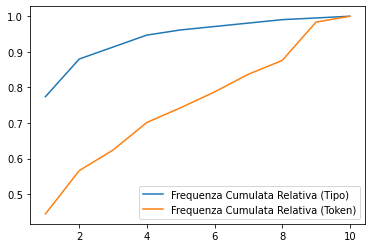

In [12]:
#Crescita di vocabolario e lessico
CdF["Frequenza Cumulata Relativa (Tipo)"].plot.line()
CdF["Frequenza Cumulata Relativa (Token)"].plot.line()
plt.legend()

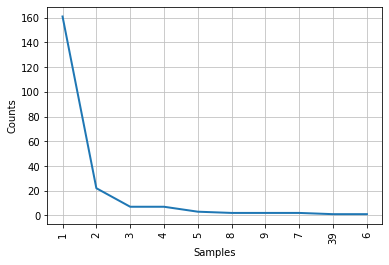

In [13]:
#spettro di frequenza
#counts = n. parole
#samples = classe
fdistRank.plot()

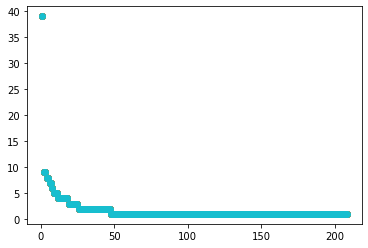

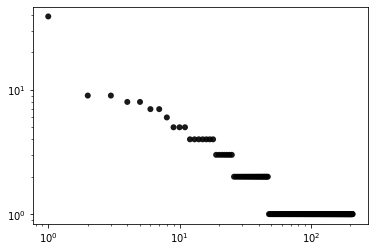

In [14]:
#Scatterplot di Zipf
for c in Distro["Frequenza"].unique():
    dfc = Distro[Distro["Frequenza"] == c]
    plt.scatter(Distro.index, (Distro["Frequenza"]), label = c)
#In scala logaritmica
fig = plt.figure()
ax = plt.gca()
ax.scatter(Distro.index ,Distro['Frequenza'] , c='black', alpha=0.9, edgecolors='none')
ax.set_yscale('log')
ax.set_xscale('log')

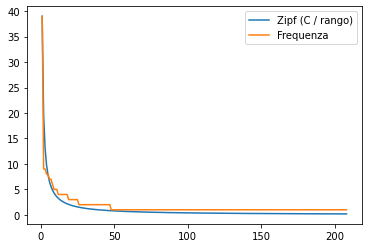

In [16]:
#Frequenza di Zipf vs. reale
Distro["Zipf (C / rango)"].plot.line()
Distro["Frequenza"].plot.line()
plt.legend()